## Pseudo Random Number Generator

Let us learn about how to generate a random number.

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

#### 1) Linear Congruent
One of the easiest way to make random number is using linear congruential.

$$x_{n+1} = a x_{n} + b \mod 2^{31}$$

pick a random $a$ and $b$ then try.

In [3]:
a = 3
b = 34
x = 9
a = 1103515245
b = 12345
x = 1239
xn = (a*x+b)%2**31
xn

1455800772

#### 2) Cycle Problem

One of the problem with linear congruent is short cycle length. For example,

$$x_{n+1} =  ax_{n} + b \mod 11$$

No matter what value you give $a$ and $b$. Your cycle length will be at most 11.

In [4]:
def linearCongruent(x):
    v = set()
    for i in range(100):
        x = (a*x+b)%(2**31)
        v.add(x)
        
    return v
sett = linearCongruent(19232422424)
len(sett)


100

#### 3) Fixing Cycle problem

One way to do it is to generate it with a better cycle and then mod 11.

In [7]:
def linearCongruent(x):
    v = set()
    for i in range(100):
        x = (a*x+b)%(2**31)
        print x%6
        
    return v

sett = linearCongruent(19232422424)
len(sett)

5
4
3
0
3
2
3
0
3
4
5
2
5
2
3
0
5
4
1
0
3
2
5
2
3
4
1
2
5
0
1
2
3
4
5
4
1
4
1
4
3
4
5
0
3
0
5
0
3
4
1
0
5
4
5
4
3
2
3
2
1
2
5
4
3
0
1
4
3
2
3
2
5
0
3
2
1
4
1
2
1
4
3
0
3
0
3
2
5
4
1
4
5
4
3
0
5
0
3
2


0

#### 4) Some available random number from numpy/python

`np.random.random` for random a float uniformly between 0 and 1.

`np.random.randint` for random integer uniformly in some range.

`np.random.randn` for random float from normal distribution with mean 0 and standard deviation 1.

In [6]:
from numpy.random import random, randint,randn


#### 5) Manipulating random number to get desired behavior.

Random a float from 0 to 5.

Random a float from -1 to 1.

Random a float form normal distribution with mean 5 and std dev 1.

Random a float form normal distribution with mean 2 and std dev 10.

[-0.74421775  0.28750297 -0.65530876 -0.21665314  0.54833857  0.66177294
 -0.40025284  0.65767666 -0.89208752 -0.25218641]


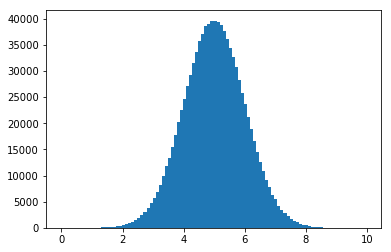

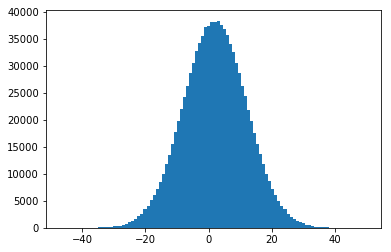

In [7]:
random(100)*5
r2 = (np.random.random(10)*2) - 1
print r2

r3 = randn(1000000) + 5
plt.hist(r3,bins=100);
plt.figure()

r4 = np.random.randn(1000000)*10 + 2

plt.hist(r4,bins=100);









6) What does np.random.seed do?

In [8]:
#we get a fixed random number, which makes testing/debugging easier

### Monte Carlo Integration

#### 1) Let integrate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a cube $x \in [-1,1], y\in [-1,1], z\in [-1,1]$

In [9]:
n = 10**5 #number of pieces
x = np.random.random(n)*2 -1
y = np.random.random(n)*2 - 1
z = np.random.random(n)* 2 -1
#V = 8. becase x * y * z

print np.sum(x**2*(y-1)**2*(z-2)**2 * np.exp(x*y*z)) * (8./n)

15.9780465514


#### 2) Evaluate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a sphere of radius 1 centered at the origin.

In [10]:

#V is still volumeo of the cube

n = 10**6 #number of pieces
x_p = np.random.random(n)*2 -1
y_p = np.random.random(n)*2 -1
z_p = np.random.random(n)*2 -1

radius = 1.0


def f(xi,yi,zi):
    return (xi**2*(yi-1)**2*(zi-2)**2 * np.exp(xi*yi*zi) )

def dist(xi,yi,zi):
    x_origin = 0
    y_origin = 0
    z_origin = 0
    return ((xi - x_origin)**2 + (yi - y_origin)**2 + (zi - z_origin)**2)**0.5
def summF(x,y,z):
    summ = 0
    for xi,yi,zi in zip(x,y,z):
        distance = dist(xi,yi,zi)
        if distance <= radius:
            summ+= f(xi,yi,zi)
    return summ* 8./n
summF(x_p,y_p,z_p)
    
            
    

3.9728101779700107

3) Do we guarantee to get the same answer when we repeat the experiment?

In [11]:
#nah


4) What do we need to do to guarantee the same answer?

In [12]:
#seed it

5) How do we defind the convergence and how fast is the convergence for monte carlo integration?

In [13]:
#var[answer] = var[sum(f(x) * v/n)]

#end result:
#var[Answer] =  (v**2)/n * var[f] 
#sigma_anser = error = v*sigma/n**0.5


## Monte Carlo Simulations

### Loaded Die.

<table>
<tr style="text-align:center">
    <td>Number</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
</tr>
<tr style="text-align:center">
    <td>Probability</td>
    <td>0.3</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.1</td>
</tr>
</table>

#### 1) Simulating the dice.

Simulate the dice result such that it has the given probability distribution.

(array([ 299542.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,  200617.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,   99844.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
         199784.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,  100176.,       0.,       0.,       0.,
              0.,       0.,       0.,       0., 

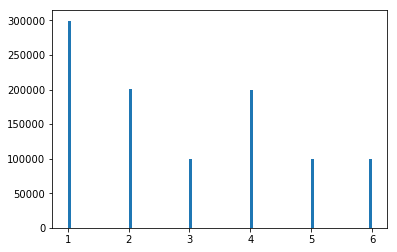

In [14]:
def dice():
    throw = np.random.rand()
    if throw <= 0.3:
        return 1
    elif throw <= 0.5:
        return 2
    elif throw <= 0.6:
        return 3
    elif throw <= 0.8:
        return 4
    elif throw <= 0.9:
        return 5
    else:
        return 6
    
throws = 1000000
result = [dice() for throw in range(throws)]

plt.hist(result,bins = 100)



    
        
    
        

#### 2) Expected Value.

What is the expected value of dice result? Try both simulation and analytical formula.

In [15]:
x = sum(result)/float(n)
analytic = 0.3*1 + 0.2*2 + 0.1*3 + 4*0.2 + 5*0.1 + 6*0.1
analytic, x

(2.9, 2.900546)

3) What is the expected value of $A+B$ where $A$ is the result of the first dice and $B$ is the result of the second dice? Use simulation and compare with analytic answer.

In [16]:
new_result = [dice()+dice() for i in range(throws)] 
sum(new_result)/float(n)


5.800571

4) What is the expected value of $AB$?

In [17]:
r3 = [dice()*dice() for throw in range(throw)]
sum(r3)/float(n)

8.406931

5) Try the experiment 10,000 times and plot out the probability of getting each result for $AB$. (Probability is given by #of times we get the number/total number of experiment.

<Container object of 18 artists>

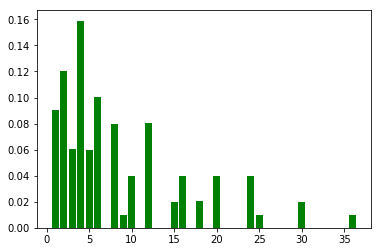

In [18]:
dic = dict()
r3 = [dice()*dice() for throw in range(throws)]
for i in r3:
    if i in dic:
        dic[i] +=1
    else:
        dic[i] = 1


for i in dic:
    dic[i] = dic[i]/float(n)

plt.bar(dic.keys(), dic.values(),  color='g')


6) Now we play the games of two people. We take the product of the two dice. Whoever get more number wins. What is the probability of getting a draw.

7) A little bit harder: consider the game of product dice. If our first dice is 3, what is the probability of winning?

### Geometric Brownian Motion.

One popular way to simulate stock is using geometric brownian motion. Stockprice at $t+dt$ is related to the stock price at time $t$ by

$$s(t+dt) = s(t) + s(t)(\mu dt + \epsilon\sigma \sqrt{dt}) $$

where
1. $\mu$ is the mean rate of return. Typically quote as $\%$ per year.
2. $\epsilon$ is a normally distributed random variable with mean 0 and variance of 1.
3. $\sigma$ is called volatility. It typically quoted as $\%$ per $\sqrt{\text{year}}$. It represent how wildly stock can go.

To use this formula, we need to make sure the unit for $t$ is correct. Normally just convert it to year

All these number can be looked up from the internet (you can calculate one yourself from historical data too). 

Here is one example: google for aapl volatility.

The funny unit of $\sqrt{t}$ has to do with scaling behavior. You can read it in the lecture notes.

1) Given the volatility($\sigma$) of $28\%$ per $\sqrt{\text{year}}$ and mean rate of return $8.77\%$. The stock today is 119.21$. Write a function to generate the price for tomorrow given the price today.

In [19]:
def next_price(s,mu,sigma,dt):
    e = np.random.randn()
    return s + s * (mu * dt + e*sigma*math.sqrt(dt))
def gen_1year(mu,sigma):
    ret = []
    ndays = 252
    s = 119.121
    dt = 1./ndays
    ret.append(s)
    for i in range(ndays - 1):
        s = next_price(s,mu,sigma,dt)
        ret.append(s)
    return ret

2) Generate the price for 1 trading year(all the time we said year it actually means trading year). Have dt = 1 day. 1 Trading year is actually 252 day.

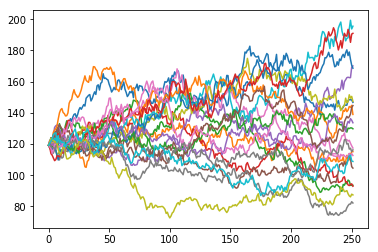

In [20]:
all_stocks = []
for  i in range(20):
    prices = gen_1year(0.0877,0.28)
    plt.plot(prices)
    all_stocks.append(prices)




3) What is the expected value of the stock at the end of year?

In [21]:
s = 0
for stock in all_stocks:
    s += stock[-1]
mean = s/20
    
    

4) What is the variance of the stock at the end of the year?

In [22]:
var = 0
for stock in all_stocks:
    var += (stock[-1] - mean)**2
print var/20
    

1037.88911505


5) What is the probability that the price of the stock will dip below 70 at anytime of the year?

In [23]:
summ = 0
for prices in all_stocks:
    for price in prices:
        if price < 70:
            summ+=1
            break
summ/20.
            
    

0.0

6) What is the proabability that th stock will dip below 100 and come back to 110 within a year? 

In [24]:
summ = 0
for prices in all_stocks:
    went_below_100 = False
    for price in prices:
        if price < 100:
            went_below_100 = True
        elif price > 110 and went_below_100:
            summ+=1
            break
            
            
print summ/20.

0.15


### Hill Climbing

### Biggest Triangle.
Let us consider the problem of finding the triangle with maximum area from given 500 points.

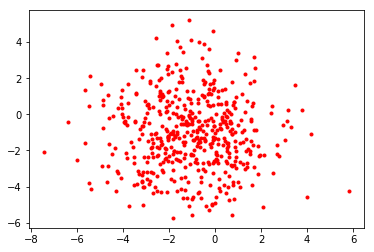

In [25]:
np.random.seed(13)
n = 500
x = np.random.randn(n)*2-1
y = np.random.randn(n)*2-1
plt.plot(x,y,'.r')

In [ ]:
def triarea(x1,y1, x2,y2, x3,y3):
    #shoelace formula
    return 0.5*abs(x1*y2 + x2*y3 + x3*y1 - y1*x2 - y2*x3 - y3*x1)

def triarea2(r):
    x1,y1 = r[0]
    x2,y2 = r[1]
    x3,y3 = r[2]
    return triarea(x1,y1, x2,y2, x3,y3)


### Scheduling Exam

Give classes and the intersection of students. Find a decent scheduling under 15 slot for 70 classes. Number of student taking both class `i` and class `j` can be found using `student[i][j]`.

In [ ]:
nclass = 70
student = np.random.randint(0,100,(nclass, nclass))

np.random.seed(222)
for i in range(nclass-1):
    for j in range(i+1,nclass):
        student[i,j] = student[j,i]

for i in range(nclass):
    student[i,i] = 0 
    
student[student>70] = 0
    
print student

plt.matshow(student)

### Simulated Annealing

1) What's wrong with Hill Climbing?

2) What is the main idea for fixing that?

3) Implement the exam scheduling again with Simulated Annealing